In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### We are using chardet module to detect the encoding of a CSV file
"rb" is to read the file in binary format

In [125]:
import chardet

with open('../Diwali_Sales_Analysis/Dataset/Diwali_Sales_Data.csv', 'rb') as f:
    result = chardet.detect(f.read())

In [126]:
sales_df = pd.read_csv("../Diwali_Sales_Analysis/Dataset/Diwali_Sales_Data.csv",encoding=result["encoding"])

In [127]:
sales_df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [128]:
sales_df.shape

(11251, 15)

### Removing the columns which are null/ do not have any data

In [129]:
sales_df.drop(labels=["Status","unnamed1"],axis=1,inplace=True)

In [130]:
sales_df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [131]:
sales_df.shape

(11251, 13)

#### Removing rows where there are null values

In [132]:
sales_df.dropna(inplace=True)

In [133]:
sales_df.shape

(11239, 13)

In [134]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


#### Changing Amount column datatype to Int64

In [135]:
sales_df["Amount"] = sales_df["Amount"].astype("int")

In [136]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


#### Changing column[Age Group] -> [Age_Group] & [Cust_name] -> [Cust_Name] to standardize dataframe headers

In [137]:
sales_df.rename(columns={"Age Group":"Age_Group","Cust_name":"Cust_Name"},inplace=True)

In [138]:
sales_df.head()

,User_ID,Cust_Name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [139]:
sales_df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


### Exploratory Data Analysis

#### 1. Gender

#### i. Seaborn Countplot to count number of orders by Female and Male

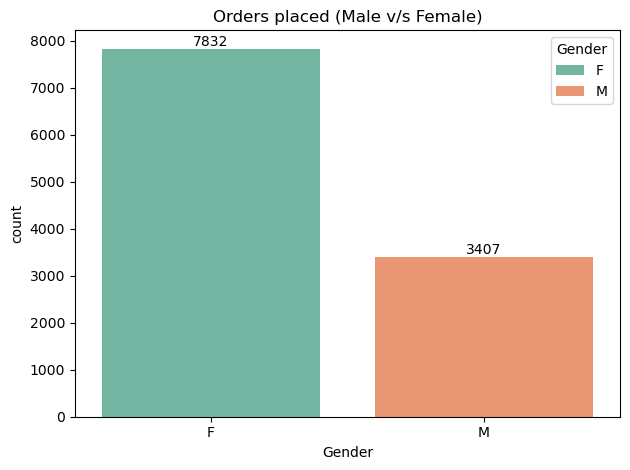

In [164]:
ax = sns.countplot(data=sales_df,x="Gender",hue="Gender",palette="Set2",legend=True)

ax.set_title("Orders placed (Male v/s Female)")
for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()

#### ii. Plotting a bar chart to see the amount spent by each gender

In [141]:
sales_df.groupby("Gender",as_index=False)["Amount"].sum()

,Gender,Amount
0,F,74335853
1,M,31913276


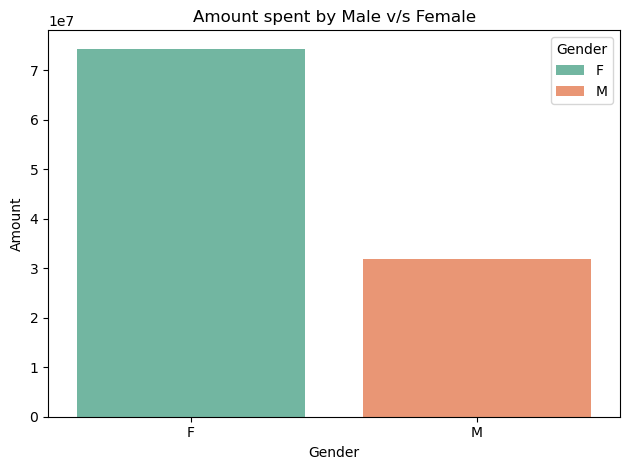

In [142]:
sales_gender = sales_df.groupby("Gender",as_index=False)["Amount"].sum()

sns.barplot(data=sales_gender,x="Gender",y="Amount",palette="Set2",hue="Gender",legend=True).set_title("Amount spent by Male v/s Female")
plt.tight_layout()


<font color="green"><b>Conclusion: <b><i>From above graphs, we see that most of the buyers are female and we can conclude that purchasing power of women are greater than men i.e. The amount spent by women is higher than men. <i></font>

#### 2. Age

#### i. Seaborn Countplot to count number of male and female in each age group

<i> Hue refers to the attribute that distinguishes different categories within a dataset. When plotting data with Seaborn, assigning a hue allows you to visually encode an additional dimension of information. <i>

<Axes: xlabel='Age_Group', ylabel='count'>

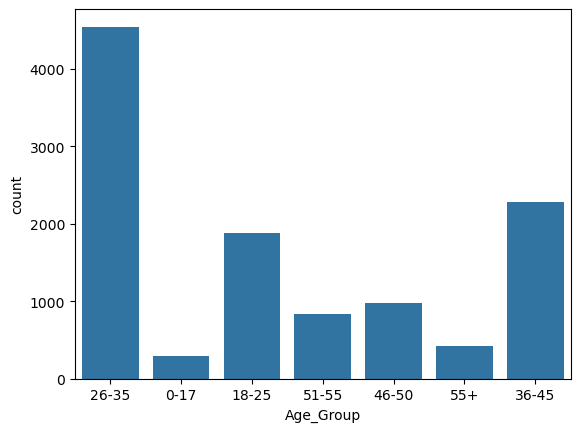

In [143]:
#Without Hue

sns.countplot(data=sales_df,x="Age_Group")

<font color='green'><b>Conclusion:<b><i> For instance, in below bar plot counting the number of people across different age groups, hue could represent the Gender, enabling us to discern both regional and categorical differences simultaneously. <i></font>

Text(0.5, 1.0, 'Orders placed by Male and Female in each age group')

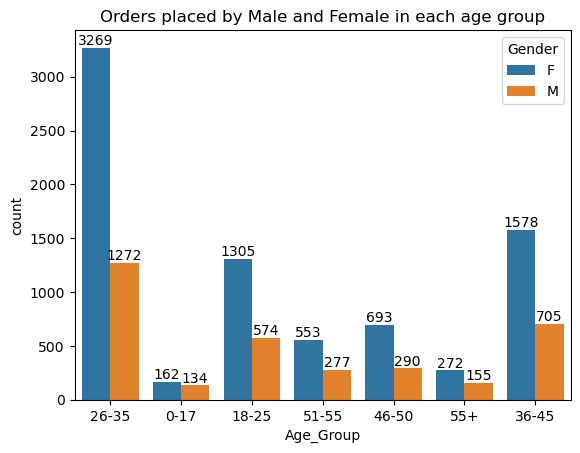

In [144]:
ax = sns.countplot(data=sales_df,x="Age_Group",hue="Gender")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title("Orders placed by Male and Female in each age group")

#### ii. Seaborn Barplot to see the amount spent by male and female in each age group

In [145]:
sales_age_group = sales_df.groupby(["Age_Group","Gender"],as_index=False)["Amount"].sum().sort_values("Amount",ascending=False)
sales_age_group

,Age_Group,Gender,Amount
4,26-35,F,30963953
6,36-45,F,15509956
2,18-25,F,11887003
5,26-35,M,11649489
8,46-50,F,6743393
7,36-45,M,6635038
10,51-55,F,5385208
3,18-25,M,5353729
11,51-55,M,2876269
9,46-50,M,2464451


Text(0.5, 1.0, 'Amount Spent by Male v/s Female in each age group')

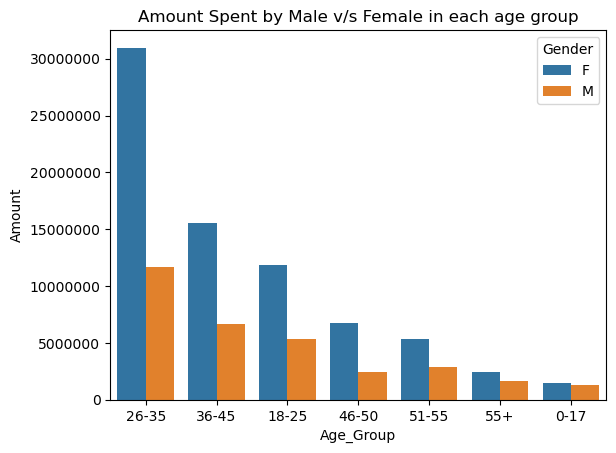

In [146]:
ax = sns.barplot(data=sales_age_group,x="Age_Group",y="Amount",hue="Gender")
ax.ticklabel_format(axis="y",scilimits=(0,10))
ax.set_title("Amount Spent by Male v/s Female in each age group")

#### <font color="green"><b>Conclusion: <b> <i> From above graphs, we can conclude that women in age group 26-35 are the major buyers and spent the most across age groups <i></font>

#### iii. Most ordered product category for each age group

In [147]:
prod_cat_age_df = sales_df.groupby(["Age_Group","Product_Category"],as_index=False)["Orders"].count().sort_values(["Age_Group","Orders"],ascending=[True,False])

prod_cat_age_sales = prod_cat_age_df.drop_duplicates("Age_Group",keep="first")

prod_cat_age_sales

,Age_Group,Product_Category,Orders
6,0-17,Food,83
22,18-25,Food,478
37,26-35,Clothing & Apparel,1057
55,36-45,Clothing & Apparel,532
73,46-50,Clothing & Apparel,234
90,51-55,Clothing & Apparel,188
108,55+,Clothing & Apparel,103


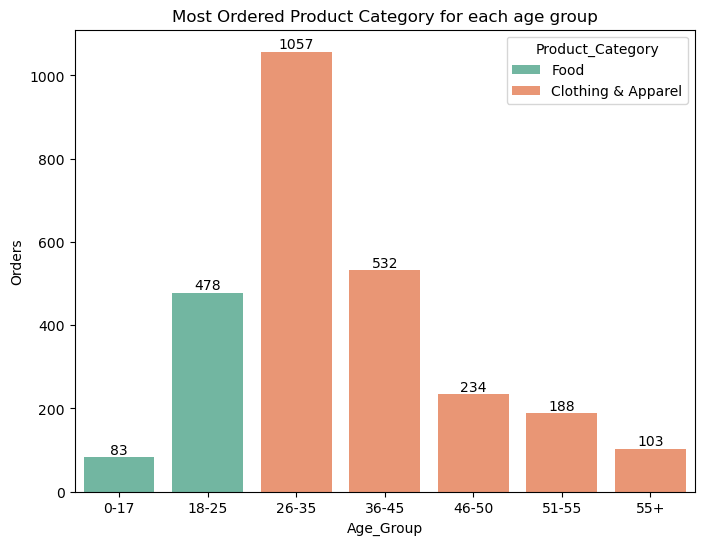

In [148]:
plt.figure(figsize=(8,6))
ax=sns.barplot(data=prod_cat_age_sales,x="Age_Group",y="Orders",hue="Product_Category",palette="Set2")
ax.set_title("Most Ordered Product Category for each age group")
for bar in ax.containers:
    ax.bar_label(bar)

#### <font color="green"><b>Conclusion: <b> <i> From above graph, we see that people in the age group 26-35 ordered Clothing & Apparel the most <i></font>

#### 3. State

#### i. We are plotting a barplot to see the top 10 states that placed the highest number of orders

In [149]:
state_orders = sales_df.groupby("State",as_index=False)["Orders"].sum().nlargest(10,"Orders")
state_orders

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


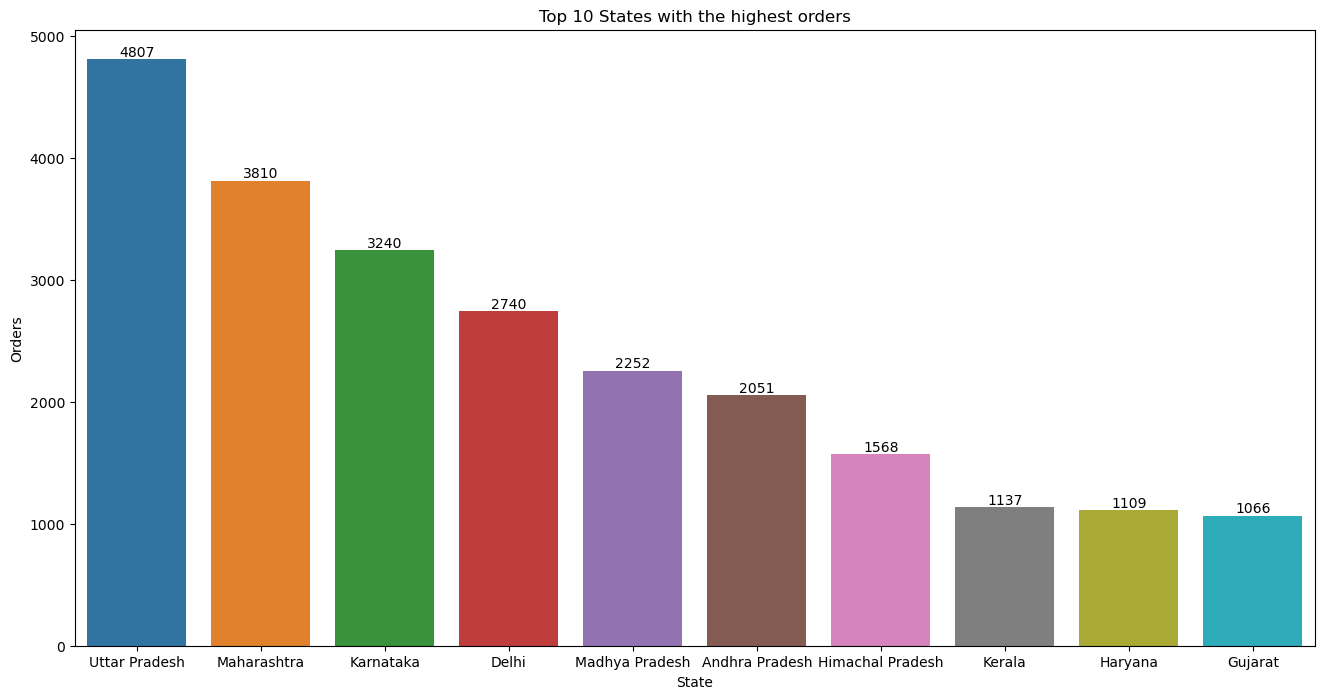

In [150]:
plt.figure(figsize=(16,8))
ax = sns.barplot(data=state_orders,x="State",y="Orders",hue="State")
ax.set_title("Top 10 States with the highest orders")
for bars in (ax.containers):
    ax.bar_label(bars)

#### ii. Total Sales Amount from top 10 states

In [151]:
sales_amount = sales_df.groupby("State",as_index=False)["Amount"].sum().nlargest(10,"Amount")
sales_amount

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


Text(0.5, 1.0, 'Top 10 States with the highest Sales Amount')

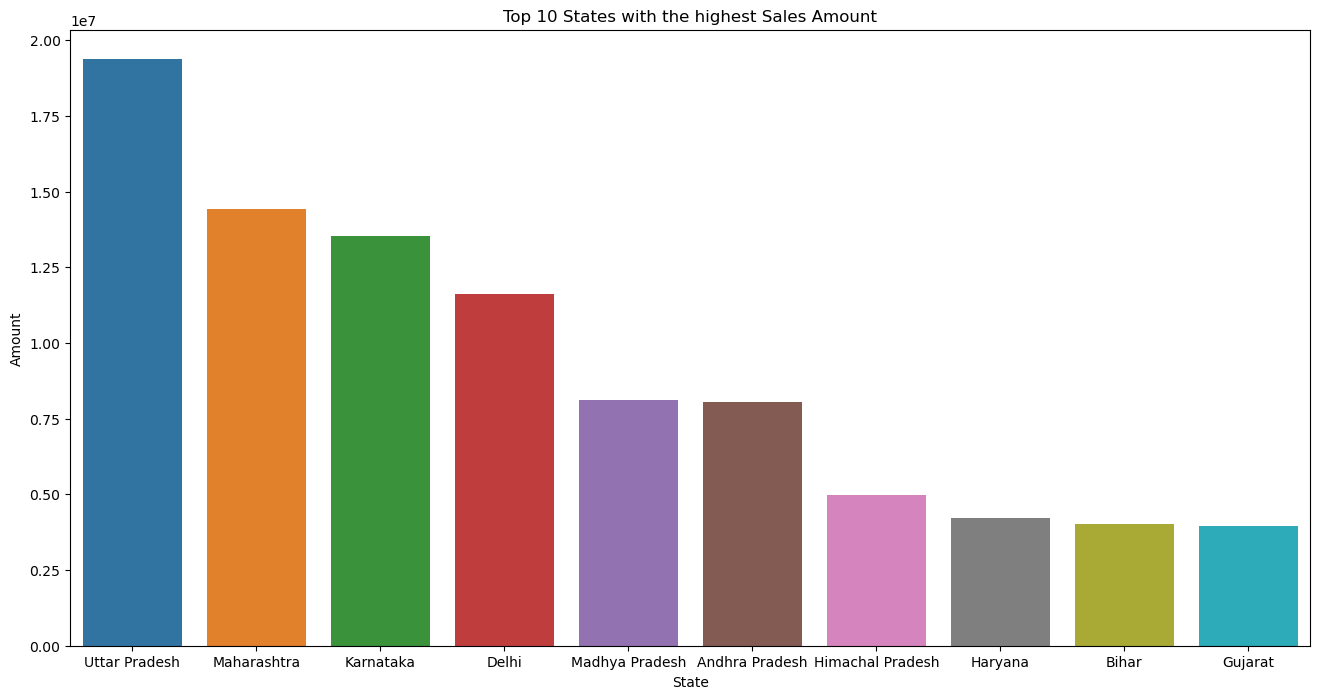

In [152]:
plt.figure(figsize=(16,8))
ax = sns.barplot(data=sales_amount,x="State",y="Amount",hue="State")
ax.set_title("Top 10 States with the highest Sales Amount")


#### <font color="green"><b>Conclusion: <b><em><i> From the above 2 graphs we can conclude that the states that placed the highest number of orders also had highest sales amount except for Kerala. Even though Kerala placed more number of orders compared to Haryana, Haryana placed orders with higher amount. <i><em></font>

#### iii. We would like to find out which product category was ordered the most in each state

In [153]:
states_products = sales_df.groupby(["State","Product_Category"],as_index=False)["Orders"].sum().sort_values(["State","Orders"],ascending=[True,False]).drop_duplicates("State",keep="first").sort_values("Orders",ascending=False)
states_products

,State,Product_Category,Orders
214,Uttar Pradesh,Food,1406
161,Maharashtra,Food,1191
114,Karnataka,Footwear & Shoes,841
37,Delhi,Footwear & Shoes,823
4,Andhra Pradesh,Electronics & Gadgets,684
81,Himachal Pradesh,Clothing & Apparel,624
139,Madhya Pradesh,Beauty,530
126,Kerala,Clothing & Apparel,453
229,Uttarakhand,Clothing & Apparel,399
97,Jharkhand,Clothing & Apparel,376


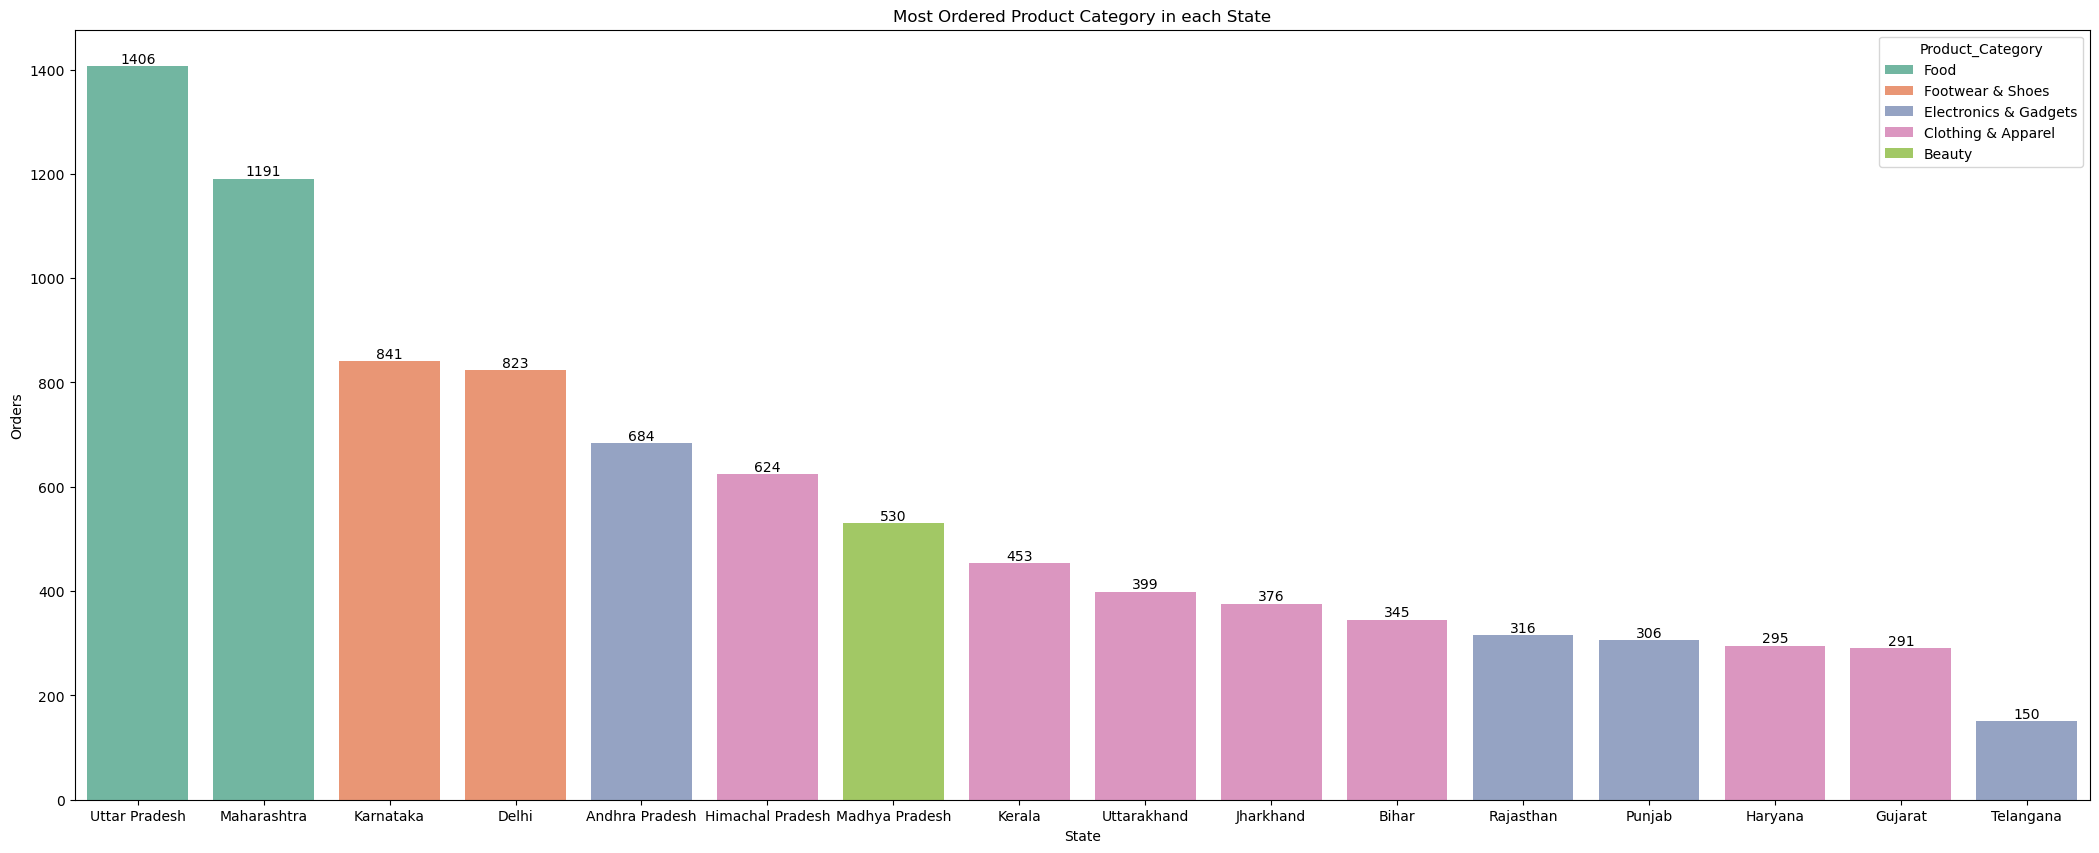

In [154]:
plt.figure(figsize=(26,10))
ax = sns.barplot(data=states_products,x="State",y="Orders",hue="Product_Category",palette="Set2")
ax.set_title("Most Ordered Product Category in each State")
for bars in (ax.containers):
    ax.bar_label(bars)

#### <font color="green"><b>Conclusion: <b><i>From the above graph we can conclude that "Food" was the most ordered product category in Uttar Pradesh & Maharashtra and 2nd highest ordered product is Footwear & Shoes <i></font>


### 4. Marital Status

#### i. Number of orders placed by married v/s unmarried

In the dataframe, married people are denoted by <b><i>0</i></b> and unmarried people are denoted by <b><i>1</i></b>

[Text(0, 0, '4721')]

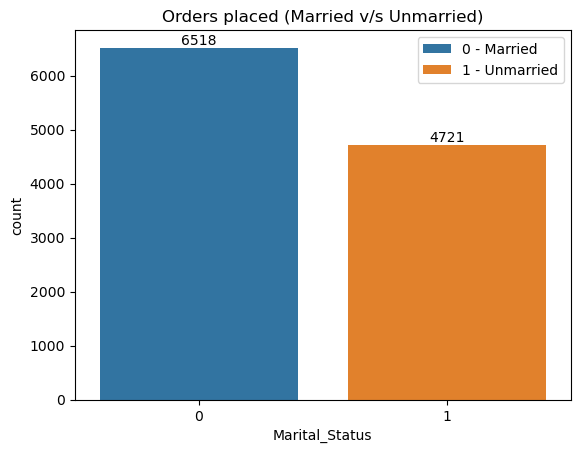

In [165]:
ax = sns.countplot(data=sales_df,x="Marital_Status",hue="Marital_Status")
ax.set_title("Orders placed (Married v/s Unmarried)")
ax.legend(labels=["0 - Married","1 - Unmarried"])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

#### ii. Amount spent my married and unmarried couple with respect to each gender

In [156]:
marital_sales = sales_df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum()
marital_sales

,Marital_Status,Gender,Amount
0,0,F,43786646
1,0,M,18338738
2,1,F,30549207
3,1,M,13574538


C:\Users\vikas\AppData\Local\Temp\ipykernel_13652\2214621401.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


[Text(0, 0.0, '0'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 20000000.0, '20,000,000'),
 Text(0, 30000000.0, '30,000,000'),
 Text(0, 40000000.0, '40,000,000'),
 Text(0, 50000000.0, '50,000,000')]

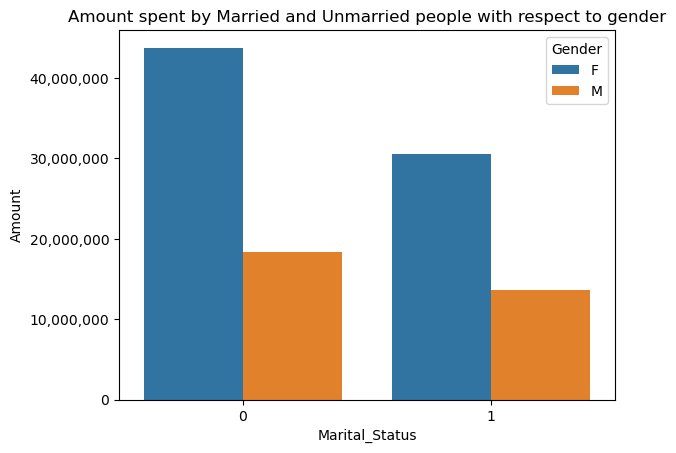

In [157]:
ax = sns.barplot(data=marital_sales,x="Marital_Status",y="Amount",hue="Gender")
ax.set_title("Amount spent by Married and Unmarried people with respect to gender")
#ax.ticklabel_format(axis="y",scilimits=(0,10))
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

#### <font color="green"><b>Conclusion: <b><i>From the above graphs, we can conclude that most of the buyers are married women and they have higher purchasing power <i></font>


### 4. Occupation

#### i. Orders placed depending on the occupation of a person

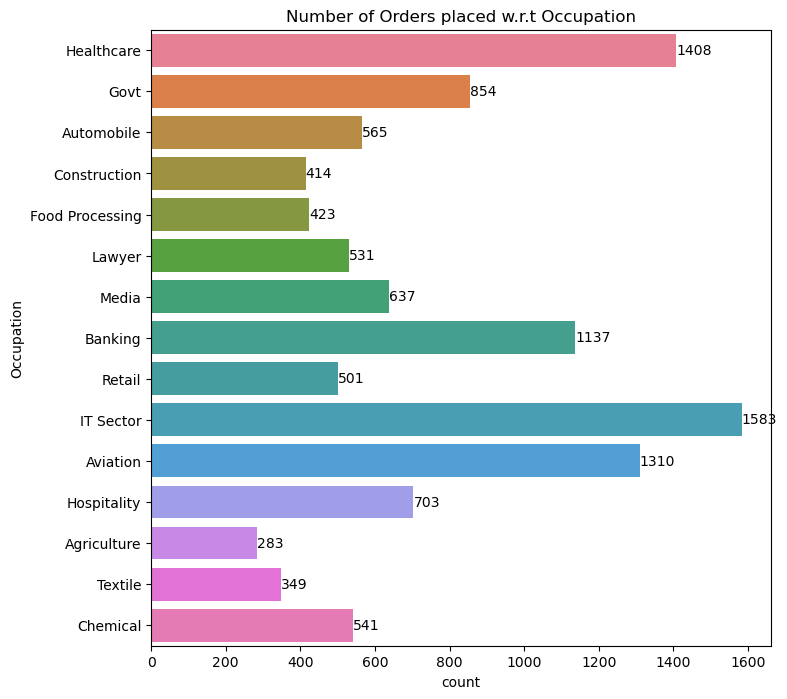

In [158]:
plt.figure(figsize=(8,8))
ax = sns.countplot(sales_df,y="Occupation",hue="Occupation",orient="h")
ax.set_title("Number of Orders placed w.r.t Occupation")

for bar in ax.containers:
    ax.bar_label(bar)

#### ii. Total Amount spent by people from each profession

In [159]:
occupation_sales = sales_df.groupby("Occupation",as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
occupation_sales

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


C:\Users\vikas\AppData\Local\Temp\ipykernel_13652\2338064024.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


[Text(0.0, 0, '0'),
 Text(2000000.0, 0, '2,000,000'),
 Text(4000000.0, 0, '4,000,000'),
 Text(6000000.0, 0, '6,000,000'),
 Text(8000000.0, 0, '8,000,000'),
 Text(10000000.0, 0, '10,000,000'),
 Text(12000000.0, 0, '12,000,000'),
 Text(14000000.0, 0, '14,000,000'),
 Text(16000000.0, 0, '16,000,000')]

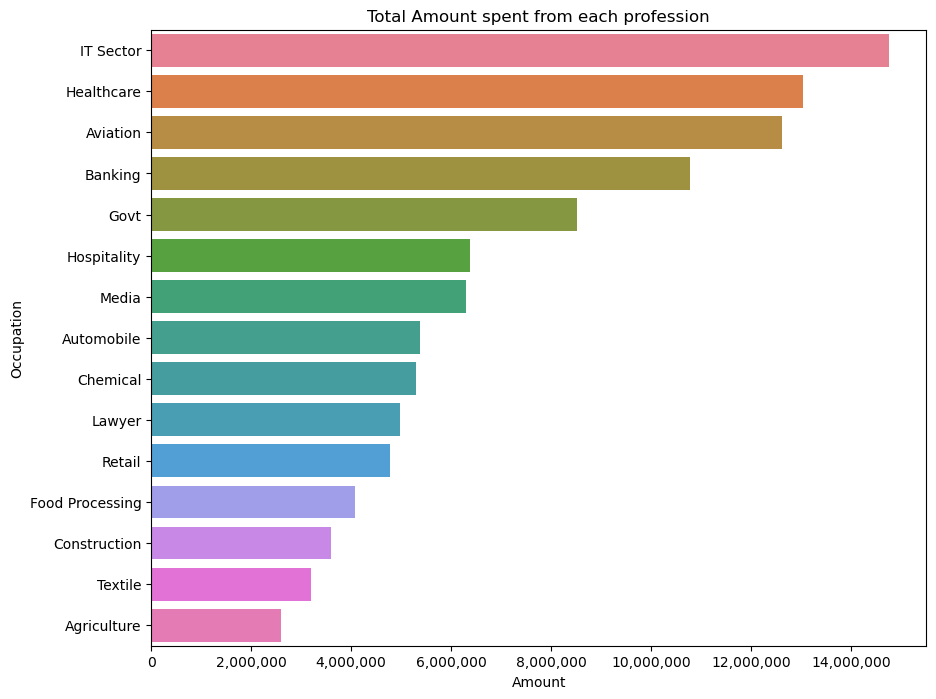

In [160]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=occupation_sales,y="Occupation",x="Amount",hue="Occupation",orient="h")
ax.set_title("Total Amount spent from each profession")
ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


#### <font color="green"><b>Conclusion: <b><i>From above graphs, we can conclude that IT professionals ordered the most items and have higher purchasing power. Healthcare and Aviation professionals come in 2nd and 3rd <i></font>


### 5. Product Category

#### i. Number of Orders for each product category

Text(0.5, 1.0, 'Number of orders w.r.t Product Category')

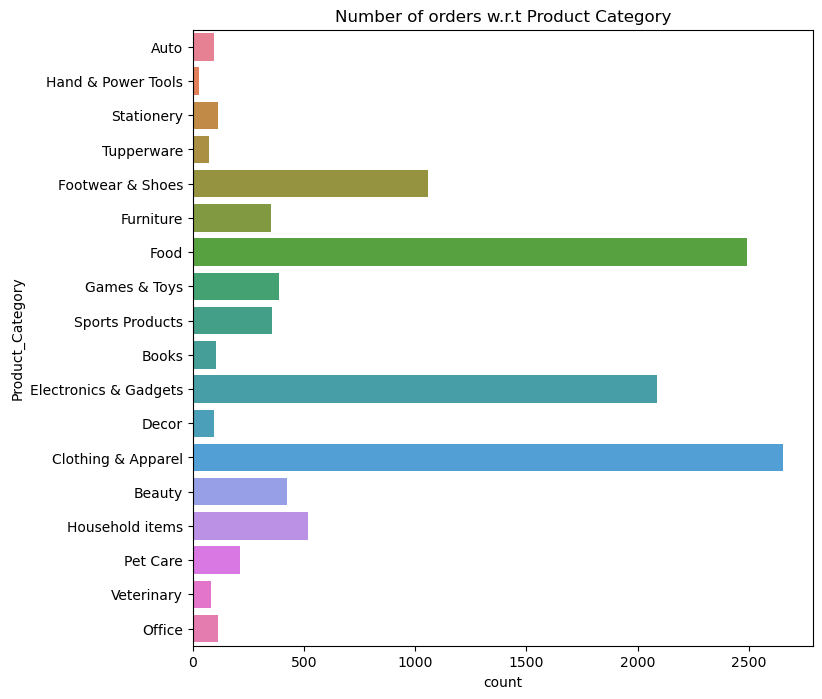

In [168]:
plt.figure(figsize=(8,8))
ax = sns.countplot(data=sales_df,y="Product_Category",hue="Product_Category")
ax.set_title("Number of orders w.r.t Product Category")

#### ii. Total amount of sales for each product category

In [162]:
prod_cat_sales = sales_df.groupby("Product_Category",as_index=False)["Amount"].sum().sort_values("Amount",ascending=False)
prod_cat_sales

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


Text(0.5, 1.0, 'Total amount of sales for each product category')

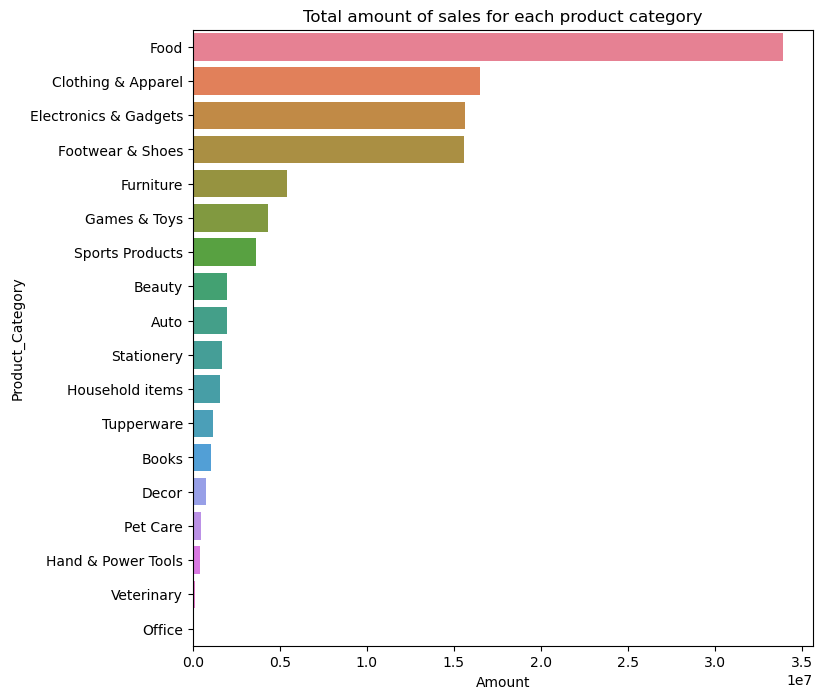

In [163]:
plt.figure(figsize=(8,8))
ax = sns.barplot(data=prod_cat_sales,x="Amount",y="Product_Category",hue="Product_Category")
ax.set_title("Total amount of sales for each product category")

#### <font color="green"><b>Conclusion: <b><i>From above graphs, we can conclude, although the highest number of orders were for Clothing & Apparel, the amount spent on Food was the highest followed by Clothing & Apparel.<i></font>


### <b>Final Conclusion:
#### Married women who belong to age group 26-35 living in Uttar Pradesh, Maharashtra & Karnataka and working in IT, Healthcare & Aviation are more likely to buy products in Food, Clothing & Electronics category.
</b>